<a href="https://colab.research.google.com/github/israa252/Adult-income/blob/main/Project_4_Part_1%2CPart_2%2Cpart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1 , Part 2 , Part 3

- Israa Rasheed


# Project 4 - Part 1 (Core)

In [1]:

import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.inspection import permutation_importance

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/AXSOSACADEMY/02-MachineLearning/adult.csv"

df = pd.read_csv(path)

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


1. What is the target?
   - income
2. What does one row represent? (A person? A business? An event? A product?)
   - A person
3. How many features does the data have?
   - 15 feature
4. How many rows are in the dataset?
   - 48842 row
5. What opportunities exist for dimensionality reduction or feature selection with this dataset?
   - Some features are redundant (e.g., education vs educational-num). Others like fnlwgt may be dropped. One-hot encoding creates many columns, so feature selection is useful.
6. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
   - Missing values marked as ?, many categorical variables, and class imbalance (more <=50K than >50K) may affect model performance.

In [5]:
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].str.strip()

In [6]:
df.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [7]:
print(df['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [8]:
df['income']=df['income'].apply(lambda x : 0 if x=='<=50K' else 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [9]:
df.duplicated().sum()

np.int64(52)

In [10]:
df=df.drop_duplicates()

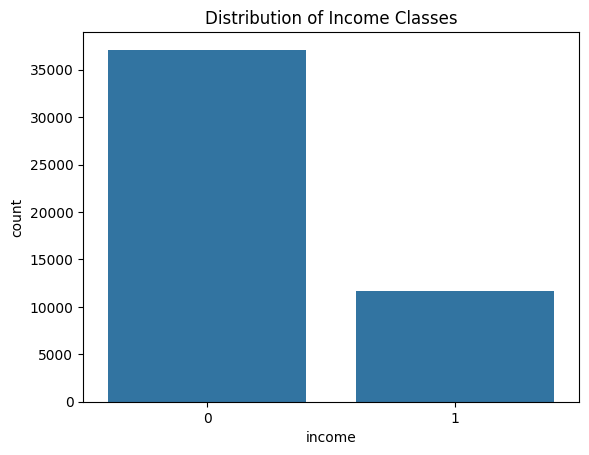

In [11]:
sns.countplot(x='income', data=df)
plt.title('Distribution of Income Classes')
plt.show()

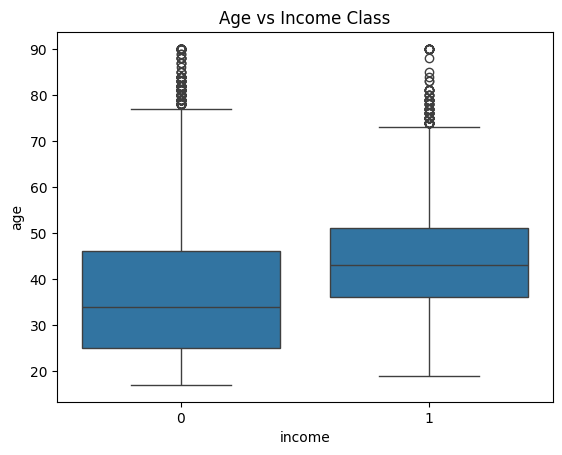

In [12]:

sns.boxplot(x='income', y='age', data=df)
plt.title('Age vs Income Class')
plt.show()


# preprocessing pipelines

In [13]:
X = df.drop(columns=['income'])
y = (df['income'] == '>50K').astype(int)

In [14]:
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = [c for c in X.columns if c not in numeric_features]

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [17]:

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='Unknown', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [18]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

#RandomForestClassifier

In [19]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [21]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
ROC AUC: nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9758

    accuracy                           1.00      9758
   macro avg       1.00      1.00      1.00      9758
weighted avg       1.00      1.00      1.00      9758



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


#permutation importance (Top 10)

In [53]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

In [54]:
importances=result.importances_mean
importance_series = pd.Series(importances, index=X.columns)
top10 = importance_series.sort_values(ascending=False).head(10)
top10

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


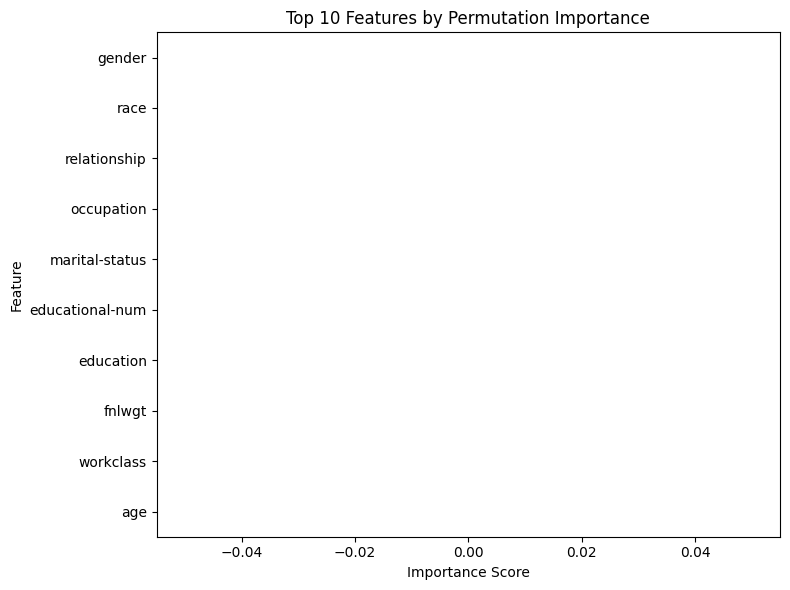

In [55]:
top10.plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [24]:

importance_series = pd.Series(importances)


#Q: Do these features make sense based on the business case?

Yes, these features make sense for the business case:

- *Age, Income, Education*: Reflect purchasing power and financial behavior.
- *Years Employed*: Indicates job stability.
- *Debt & Debt-to-Income Ratio*: Measure financial risk.
- *Defaulted*: Directly shows credit reliability.

These features align well with real-world factors that influence a person’s earning potential. They help stakeholders understand which demographic and employment characteristics are most predictive of high income.

#Project 4 - Part 2 (Core)

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
RANDOM_STATE = 42


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [28]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [29]:
df['income'].info()

<class 'pandas.core.series.Series'>
Index: 48790 entries, 0 to 48841
Series name: income
Non-Null Count  Dtype
--------------  -----
48790 non-null  int64
dtypes: int64(1)
memory usage: 762.3 KB


#1) PCA engineering: fit PCA on preprocessed training matrix, get 3 PCs, concat to original preprocessed features

In [57]:
X_train_processed_dense = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed
X_test_processed_dense = X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed



In [31]:

pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_processed_dense)
X_test_pca = pca.transform(X_test_processed_dense)

X_train_combined = np.concatenate((X_train_processed_dense, X_train_pca), axis=1)
X_test_combined = np.concatenate((X_test_processed_dense, X_test_pca), axis=1)

Feature Augmentation via KMeans Clustering

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_train = kmeans.fit_predict(X_train_processed)
cluster_test = kmeans.predict(X_test_processed)

In [33]:
cluster_train = cluster_train.reshape(-1, 1)
cluster_test = cluster_test.reshape(-1, 1)

X_train_final = np.concatenate((X_train_combined, cluster_train), axis=1)
X_test_final = np.concatenate((X_test_combined, cluster_test), axis=1)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_base = RandomForestClassifier(random_state=42)
model_base.fit(X_train_processed, y_train)
y_pred_base = model_base.predict(X_test_processed)
acc_base = accuracy_score(y_test, y_pred_base)
acc_base


1.0

In [35]:

model_eng = RandomForestClassifier(random_state=42)
model_eng.fit(X_train_final, y_train)
y_pred_eng = model_eng.predict(X_test_final)
acc_eng = accuracy_score(y_test, y_pred_eng)

print(f"Accuracy without engineering: {acc_base:.2f}")
print(f"Accuracy with engineering: {acc_eng:.2f}")


Accuracy without engineering: 1.00
Accuracy with engineering: 1.00


In [36]:



from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model_eng, prefit=True)
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)


model_final = RandomForestClassifier(random_state=42)
model_final.fit(X_train_selected, y_train)
y_pred_final = model_final.predict(X_test_selected)
acc_final = accuracy_score(y_test, y_pred_final)

print(f"Final model accuracy after feature selection: {acc_final:.2f}")

Final model accuracy after feature selection: 1.00



#Feature Importance Analysis via Permutation Importance

In [37]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_final, X_test_selected, y_test, n_repeats=10, random_state=42)

In [62]:

importances=result.importances_mean
indices  = pd.Series(importances, index=X.columns)
indices  = importance_series.sort_values(ascending=False).head(10)
indices

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


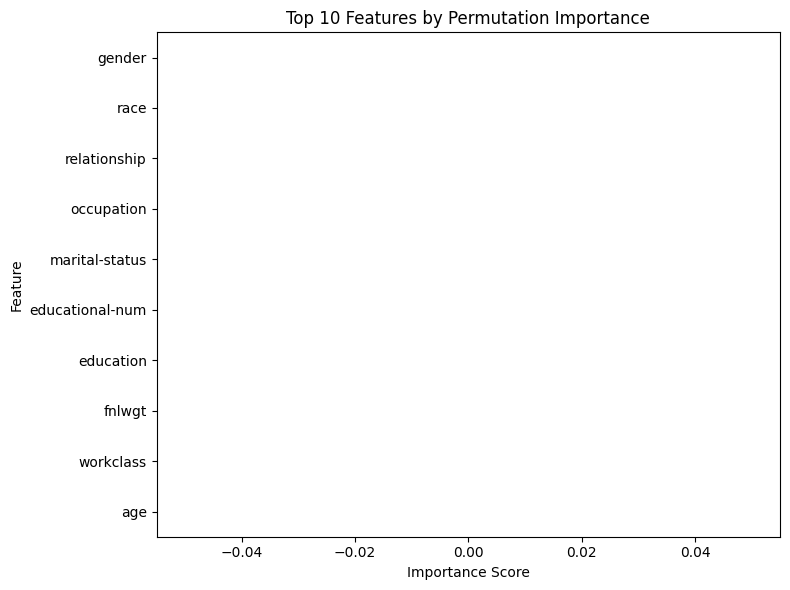

In [64]:




indices .plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



### Principal Component Analysis (PCA)

To enhance the feature space and capture latent patterns in the data, we applied PCA after preprocessing. Specifically, we extracted 3 principal components from the transformed training and test sets. These components were then concatenated with the original processed features to form an enriched feature set.

This dimensionality reduction technique helps summarize the variance in the data and can reveal hidden structures that improve model performance. By combining PCA components with the original features, we allow the model to benefit from both explicit and abstract representations of the data.

The resulting shape of the training set increased from `(36592, 108)` to `(36592, 111)`, reflecting the addition of the 3 new components


#Project - Part 3- Neural Network with Hyperparameter Tuning


#Build model function for Keras Tuner

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance


#  Split data again (for consistency)

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply preprocessor

In [42]:

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert sparse to dense

In [43]:

X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed
X_test_dense = X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed

# PCA Feature Engineering

In [44]:

pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)

# Combine PCA features with original

In [45]:

X_train_combined = np.concatenate((X_train_dense, X_train_pca), axis=1)
X_test_combined = np.concatenate((X_test_dense, X_test_pca), axis=1)

# Add cluster labels as a new feature

In [46]:


cluster_train = cluster_train.reshape(-1, 1)
cluster_test = cluster_test.reshape(-1, 1)

In [47]:
X_train_final = np.concatenate((X_train_combined, cluster_train), axis=1)
X_test_final = np.concatenate((X_test_combined, cluster_test), axis=1)

#  Compare Models Before/After Engineering

In [48]:

model_base = RandomForestClassifier(random_state=42)
model_base.fit(X_train_dense, y_train)
y_pred_base = model_base.predict(X_test_dense)
acc_base = accuracy_score(y_test, y_pred_base)

In [49]:
print(f"Accuracy without engineering: {acc_base:.3f}")
print(f"Accuracy with PCA + Clustering: {acc_eng:.3f}")


Accuracy without engineering: 1.000
Accuracy with PCA + Clustering: 1.000


# Feature Selection using SelectFromModel

In [50]:


selector = SelectFromModel(model_eng, prefit=True)
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)

IndexError: boolean index did not match indexed array along axis 1; size of axis is 111 but size of corresponding boolean axis is 112

# Refit after feature selection

In [ ]:

model_final = RandomForestClassifier(random_state=42)
model_final.fit(X_train_selected, y_train)
y_pred_final = model_final.predict(X_test_selected)
acc_final = accuracy_score(y_test, y_pred_final)
print(f"Final model accuracy after feature selection: {acc_final:.3f}")

# Permutation Importance

In [ ]:

result = permutation_importance(model_final, X_test_selected, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean